# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
#set script to run at certain intervals with time
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#06-2-07
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
#setup a weather dictionary to hold the weather data
#based on starter code we need to get latitude, longitude, max temp, humidity cloudiness, windspeed, country code, and date
lat_c = []
long_c = []
max_temp = []
humidity = []
cloudiness = []
wind_spd = []
ccode = []
date = []
name = []
#for records 50 maximum in set
record = 0
record_max = 50
set = 1

 
#Input header information
print(f"Beginning Data Retrieval")
print(f"------------------------------")


#Loop throught hte cities series by city
for city in cities:
    #06-02010 do try and except
    try:
        #https://openweathermap.org/current#one
        #building the api call and telling it we need to sort via city
        response = requests.get(query_url + city).json()
        #calling for lat in coord
        lat_c.append(response["coord"]["lat"])
        #calling for Long in coord
        long_c.append(response["coord"]["lon"])
        #calling for max_temp in main
        max_temp.append(response["main"]["temp_max"])
        #calling for humidity in main
        humidity.append(response["main"]["humidity"])
        #calling for cloudiness (clouds) all
        cloudiness.append(response["clouds"]["all"])
        #calling for wind speed in wind
        wind_spd.append(response["wind"]["speed"])
        #calling country code in sys
        ccode.append(response["sys"]["country"])
        #calling date in dt
        date.append(response["dt"])
        #DUE TO requirement to keep equal the LENGTHS OF DATASETS WE NEED TO CALL ONLY THE CITIES FOUND
        name.append(response["name"])
    except:
        print(f" City not Found. Skipping...")
        pass
    #to delay calls
    time.sleep(1)
    #records and set information
    record = record + 1
    if record > record_max:
        record = 1
        set = set + 1
    print(f"Processing Record {record} of Set {set} | {city}")

print(f"------------------------------")     
print(f" Data Retrieval Complete")
print(f"------------------------------")    
#print the looped entry each time    

Beginning Data Retrieval
------------------------------
Processing Record 1 of Set 1 | harper
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | kaitangata
 City not Found. Skipping...
Processing Record 4 of Set 1 | illoqqortoormiut
Processing Record 5 of Set 1 | necochea
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | patacamaya
Processing Record 8 of Set 1 | korla
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | fortuna
Processing Record 13 of Set 1 | padang
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | kumba
Processing Record 20 of Set 1 | sovetskaya
Processing Record 21 of Set 1 | hendek
Processing Record 22 of Set 1 | rikitea
Processing Reco

Processing Record 38 of Set 4 | nordenham
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | katsuura
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | west melbourne
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | hammerfest
Processing Record 45 of Set 4 | ayagoz
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | norsup
Processing Record 48 of Set 4 | calama
Processing Record 49 of Set 4 | mount pleasant
Processing Record 50 of Set 4 | bullhead city
Processing Record 1 of Set 5 | arlit
Processing Record 2 of Set 5 | nelson bay
Processing Record 3 of Set 5 | lumut
Processing Record 4 of Set 5 | palu
Processing Record 5 of Set 5 | castro
Processing Record 6 of Set 5 | chapais
Processing Record 7 of Set 5 | esperance
Processing Record 8 of Set 5 | jalu
Processing Record 9 of Set 5 | narsaq
Processing Record 10 of Set 5 | shimoda
Processing Record 11 of Set 5 | banjar
Processing Record 12 of Set 5 | anc

Processing Record 31 of Set 8 | aklavik
Processing Record 32 of Set 8 | broken hill
Processing Record 33 of Set 8 | kabinda
Processing Record 34 of Set 8 | birin
Processing Record 35 of Set 8 | sistranda
Processing Record 36 of Set 8 | tucuman
Processing Record 37 of Set 8 | carutapera
Processing Record 38 of Set 8 | benguela
Processing Record 39 of Set 8 | eleousa
Processing Record 40 of Set 8 | balkanabat
Processing Record 41 of Set 8 | sokoni
Processing Record 42 of Set 8 | la palma del condado
Processing Record 43 of Set 8 | axim
Processing Record 44 of Set 8 | vega de alatorre
 City not Found. Skipping...
Processing Record 45 of Set 8 | nizhneyansk
Processing Record 46 of Set 8 | zyryanka
Processing Record 47 of Set 8 | road town
Processing Record 48 of Set 8 | tura
Processing Record 49 of Set 8 | opuwo
Processing Record 50 of Set 8 | puerto escondido
Processing Record 1 of Set 9 | sao joao da barra
Processing Record 2 of Set 9 | mezhdurechensk
Processing Record 3 of Set 9 | yular

Processing Record 17 of Set 12 | tevriz
Processing Record 18 of Set 12 | fez
Processing Record 19 of Set 12 | khalkhal
Processing Record 20 of Set 12 | zhuanghe
Processing Record 21 of Set 12 | liepaja
Processing Record 22 of Set 12 | mnogovershinnyy
Processing Record 23 of Set 12 | anamur
Processing Record 24 of Set 12 | sijunjung
Processing Record 25 of Set 12 | union
Processing Record 26 of Set 12 | yabelo
Processing Record 27 of Set 12 | pahrump
 City not Found. Skipping...
Processing Record 28 of Set 12 | lolua
Processing Record 29 of Set 12 | mecca
------------------------------
 Data Retrieval Complete
------------------------------


In [30]:
#create dataframe
weather_comb = {"Cities": name,
             "Latitude": lat_c,
              "Longitude": long_c,
                "Humidity": humidity,
              "Max Temperature": max_temp,
              "Cloudiness": cloudiness,
              "Wind Speed": wind_spd,
              "Country Code": ccode,
              "Date": date            
             }

#turn the dictionary into a data frame
weather_df = pd.DataFrame(weather_comb)


In [31]:
weather_df.head()

,Cities,Latitude,Longitude,Humidity,Max Temperature,Cloudiness,Wind Speed,Country Code,Date
0,Harper,4.3750,-7.7169,88,78.69,22,8.59,LR,1612053318
1,Punta Arenas,-53.1500,-70.9167,62,51.80,0,26.46,CL,1612053319
2,Kaitangata,-46.2817,169.8464,80,61.00,100,13.00,NZ,1612053320
3,Necochea,-38.5473,-58.7368,67,59.00,26,4.00,AR,1612053322
4,Jamestown,42.0970,-79.2353,86,17.60,1,3.44,US,1612053323


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
#output the Dataframe above to CSV
#06-03-05 L 6
weather_df.to_csv("Weather_output.csv")

In [33]:
weather_df.head()

,Cities,Latitude,Longitude,Humidity,Max Temperature,Cloudiness,Wind Speed,Country Code,Date
0,Harper,4.3750,-7.7169,88,78.69,22,8.59,LR,1612053318
1,Punta Arenas,-53.1500,-70.9167,62,51.80,0,26.46,CL,1612053319
2,Kaitangata,-46.2817,169.8464,80,61.00,100,13.00,NZ,1612053320
3,Necochea,-38.5473,-58.7368,67,59.00,26,4.00,AR,1612053322
4,Jamestown,42.0970,-79.2353,86,17.60,1,3.44,US,1612053323


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
clean_city_data = weather_df[weather_df["Humidity"] <= 100]



In [35]:
#  Get the indices of cities that have humidity over 100%.


In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

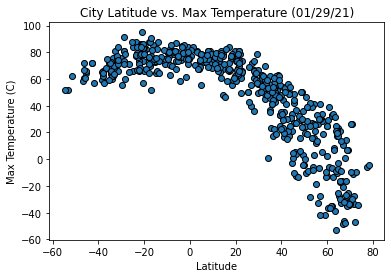

In [37]:
#to match the starter we need black edges
plt.scatter(clean_city_data["Latitude"],clean_city_data["Max Temperature"],edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (01/29/21)")
plt.savefig("output/Latitude_vs_Max_Temperature.png")


## Latitude vs. Humidity Plot

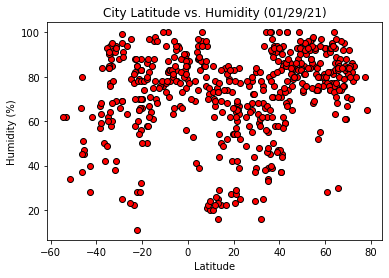

In [38]:
#to match the starter we need black edges doing red just for fun
plt.scatter(clean_city_data["Latitude"],clean_city_data["Humidity"],c="red",edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (01/29/21)")
plt.savefig("output/Latitude_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

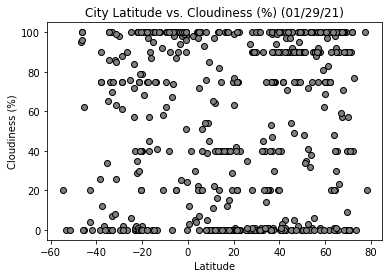

In [39]:
#to match the starter we need black edges
plt.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness"],c="grey",edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) (01/29/21)")
plt.savefig("output/Latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

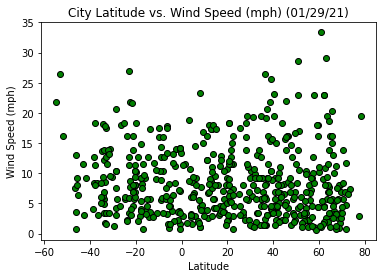

In [40]:
#to match the starter we need black edges
plt.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed"],c="green",edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph) (01/29/21)")
plt.savefig("output/Latitude_vs_Wind_Speed.png")

## Linear Regression

In [41]:
#similar to approach on last homework
#fist need to seperate datasets into north and south hemispheres
clean_city_data.head()
ccd_north=clean_city_data.loc[clean_city_data["Latitude"] > 0]
ccd_south=clean_city_data.loc[clean_city_data["Latitude"] < 0]

In [42]:
ccd_north.head()

,Cities,Latitude,Longitude,Humidity,Max Temperature,Cloudiness,Wind Speed,Country Code,Date
0,Harper,4.3750,-7.7169,88,78.69,22,8.59,LR,1612053318
4,Jamestown,42.0970,-79.2353,86,17.60,1,3.44,US,1612053323
6,Korla,41.7597,86.1469,85,18.37,0,4.43,CN,1612053325
7,Hamilton,39.1834,-84.5333,93,33.01,90,10.36,US,1612053326
10,Fortuna,40.5982,-124.1573,71,54.00,90,19.57,US,1612053099


In [43]:
ccd_south.head()

,Cities,Latitude,Longitude,Humidity,Max Temperature,Cloudiness,Wind Speed,Country Code,Date
1,Punta Arenas,-53.1500,-70.9167,62,51.80,0,26.46,CL,1612053319
2,Kaitangata,-46.2817,169.8464,80,61.00,100,13.00,NZ,1612053320
3,Necochea,-38.5473,-58.7368,67,59.00,26,4.00,AR,1612053322
5,Patacamaya,-17.2333,-67.9167,67,51.66,45,8.19,BO,1612053324
8,Bluff,-46.6000,168.3333,66,58.46,95,7.52,NZ,1612053328


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

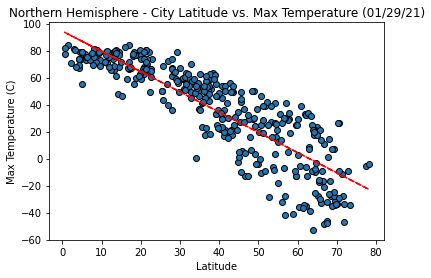

In [44]:
nhslope,nhint,nhr,nhp,nhstd_err = linregress(ccd_north["Latitude"],ccd_north["Max Temperature"])
fit = nhslope*ccd_north["Latitude"]+nhint
plt.scatter(ccd_north["Latitude"],ccd_north["Max Temperature"],edgecolors='black')
plt.plot(ccd_north["Latitude"],fit,"--",c='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (01/29/21)")
plt.savefig("output/NH_Latitude_vs_Max_Temperature.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

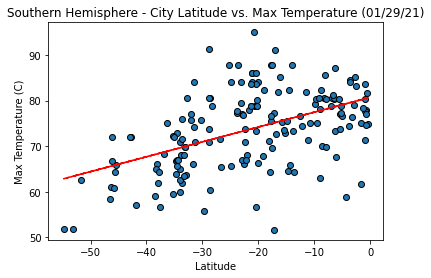

In [45]:
shslope,shint,shr,shp,shstd_err = linregress(ccd_south["Latitude"],ccd_south["Max Temperature"])
fit = shslope*ccd_south["Latitude"]+shint
plt.scatter(ccd_south["Latitude"],ccd_south["Max Temperature"],edgecolors='black')
plt.plot(ccd_south["Latitude"],fit,"--",c='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (01/29/21)")
plt.savefig("output/SH_Latitude_vs_Max_Temperature.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

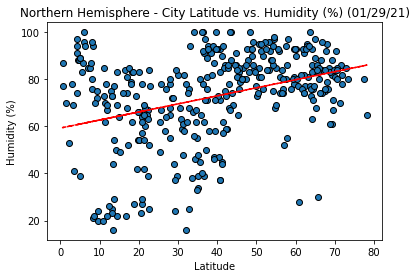

In [46]:
nhslope,nhint,nhr,nhp,nhstd_err = linregress(ccd_north["Latitude"],ccd_north["Humidity"])
fit = nhslope*ccd_north["Latitude"]+nhint
plt.scatter(ccd_north["Latitude"],ccd_north["Humidity"],edgecolors='black')
plt.plot(ccd_north["Latitude"],fit,"--",c='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - City Latitude vs. Humidity (%) (01/29/21)")
plt.savefig("output/NH_Latitude_vs_Humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

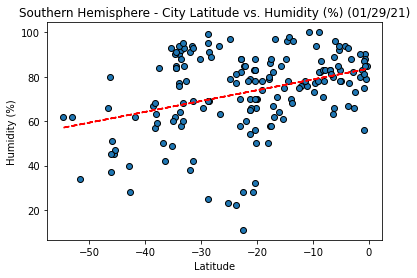

In [47]:
shslope,shint,shr,shp,shstd_err = linregress(ccd_south["Latitude"],ccd_south["Humidity"])
fit = shslope*ccd_south["Latitude"]+shint
plt.scatter(ccd_south["Latitude"],ccd_south["Humidity"],edgecolors='black')
plt.plot(ccd_south["Latitude"],fit,"--",c='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - City Latitude vs. Humidity (%) (01/29/21)")
plt.savefig("output/SH_Latitude_vs_Humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

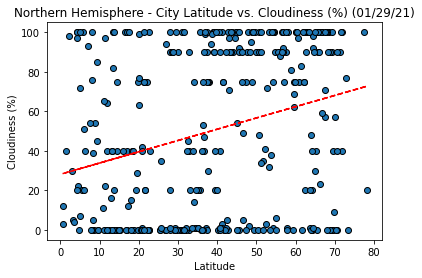

In [48]:
nhslope,nhint,nhr,nhp,nhstd_err = linregress(ccd_north["Latitude"],ccd_north["Cloudiness"])
fit = nhslope*ccd_north["Latitude"]+nhint
plt.scatter(ccd_north["Latitude"],ccd_north["Cloudiness"],edgecolors='black')
plt.plot(ccd_north["Latitude"],fit,"--",c='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (%) (01/29/21)")
plt.savefig("NH_Latitude_vs_Cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

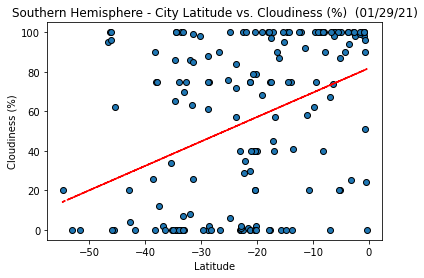

In [52]:
shslope,shint,shr,shp,shstd_err = linregress(ccd_south["Latitude"],ccd_south["Cloudiness"])
fit = shslope*ccd_south["Latitude"]+shint
plt.scatter(ccd_south["Latitude"],ccd_south["Cloudiness"],edgecolors='black')
plt.plot(ccd_south["Latitude"],fit,"--",c='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (%)  (01/29/21)")
plt.savefig("output/SH_Latitude_vs_Cloudiness.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

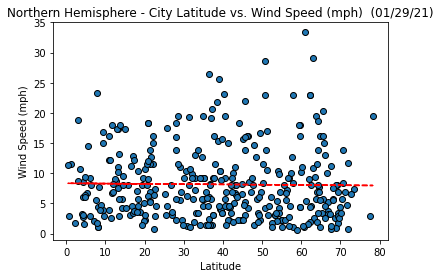

In [50]:
nhslope,nhint,nhr,nhp,nhstd_err = linregress(ccd_north["Latitude"],ccd_north["Wind Speed"])
fit = nhslope*ccd_north["Latitude"]+nhint
plt.scatter(ccd_north["Latitude"],ccd_north["Wind Speed"],edgecolors='black')
plt.plot(ccd_north["Latitude"],fit,"--",c='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (mph)  (01/29/21)")
plt.savefig("output/NH_Latitude_vs_Wind_Speed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

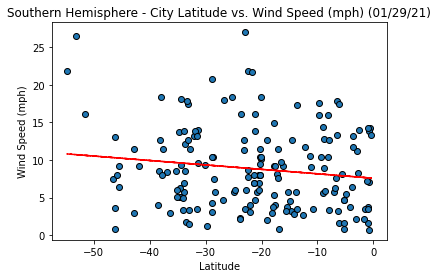

In [51]:
shslope,shint,shr,shp,shstd_err = linregress(ccd_south["Latitude"],ccd_south["Wind Speed"])
fit = shslope*ccd_south["Latitude"]+shint
plt.scatter(ccd_south["Latitude"],ccd_south["Wind Speed"],edgecolors='black')
plt.plot(ccd_south["Latitude"],fit,"--",c='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (mph) (01/29/21)")
plt.savefig("output/SH_Latitude_vs_Wind_Speed.png")